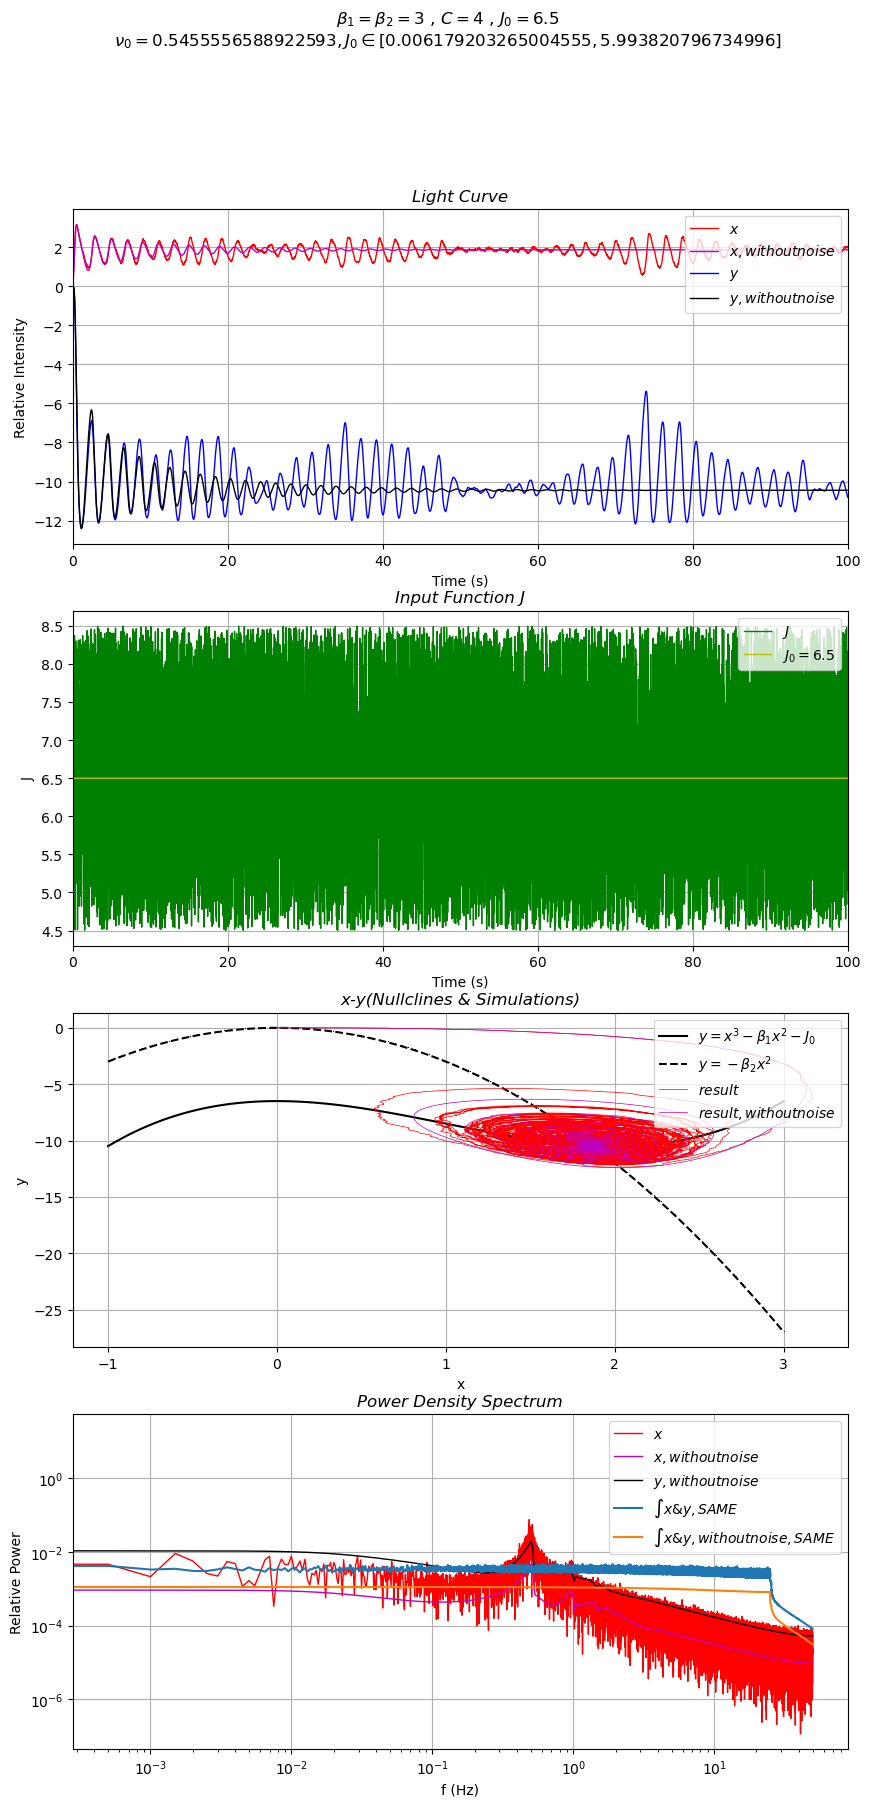

In [34]:
#复现第一篇论文：解MHR模型，通过修改C和J0的值得到不同类型的相对强度、输入参数J、傅里叶变换后的相对强度

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.signal import convolve

Fs=100#采样频率
dt=1/Fs#采样周期，即相邻两数据点的时间间隔
t_total=2000
n=int(t_total/dt)#信号长度

x=np.zeros(n,dtype=float)
y=np.zeros(n,dtype=float)
vx=np.zeros(n,dtype=float)
vy=np.zeros(n,dtype=float)
t=np.arange(n)*dt

ρ=1
β1=3
#β1=0.1875**0.5
#β1=np.sqrt(0.1875)
#β1=np.sqrt(3.1)
β2=β1

C=4
J0=6.5
J=J0+C*(np.random.random(n)-0.5)#构建随机数组J

#计算
for i in range(0,n-1):
    vx[i+1]=-ρ*(x[i]**3)+β1*(x[i]**2)+y[i]+J[i]
    vy[i+1]=-β2*(x[i]**2)-y[i]
    x[i+1]=x[i]+vx[i+1]*dt
    y[i+1]=y[i]+vy[i+1]*dt

#无噪音的解
x_wn=np.zeros(n,dtype=float)
y_wn=np.zeros(n,dtype=float)
vx_wn=np.zeros(n,dtype=float)
vy_wn=np.zeros(n,dtype=float)
for i in range(0,n-1):
    vx_wn[i+1]=-ρ*(x_wn[i]**3)+β1*(x_wn[i]**2)+y_wn[i]+J0
    vy_wn[i+1]=-β2*(x_wn[i]**2)-y_wn[i]
    x_wn[i+1]=x_wn[i]+vx_wn[i+1]*dt
    y_wn[i+1]=y_wn[i]+vy_wn[i+1]*dt

#绘图
fig=plt.figure(figsize=(10,20),dpi=100)
ν0=np.sqrt(4/3*β1**2-0.25)/2/np.pi
J0_low=((β1-np.sqrt(β1**2-3))/3)**3
J0_high=((β1+np.sqrt(β1**2-3))/3)**3
fig.suptitle(r'$\beta_1=\beta_2=$'+str(β1)+' , '+r'$C=$'+str(C)+' , '+r'$J_0=$'+str(J0)+'\n'
             +r'$\nu_0=$'+str(ν0)+r'$,J_0 \in$'+r'$[$'+str(J0_low)+r'$,$'+str(J0_high)+r'$]$')

#绘制x的图像，由于数据量较大，只展示前percent
percent=0.05
ax=fig.add_subplot(4,1,1)
ax.plot(t[:int(percent*n)],x[:int(percent*n)],'r',lw=1,label=r'$x$')
ax.plot(t[:int(percent*n)],x_wn[:int(percent*n)],'m',lw=1,label=r'$x,without noise$')
#ax.plot(t[:int(percent*n)],vx[:int(percent*n)],'b',lw=1,label=r'$vx$')
#ax.plot(t[:int(percent*n)],vx_wn[:int(percent*n)],'k',lw=1,label=r'$vx,without noise$')
ax.plot(t[:int(percent*n)],y[:int(percent*n)],'b',lw=1,label=r'$y$')
ax.plot(t[:int(percent*n)],y_wn[:int(percent*n)],'k',lw=1,label=r'$y,without noise$')
ax.set_title(r'Light Curve',fontstyle='italic')
ax.set_xlabel(r'Time (s)')
ax.set_ylabel(r'Relative Intensity')
ax.set_xlim(0, percent*n*dt)
ax.legend(loc = 'upper right')
ax.grid()

#绘制J的图像，由于数据量较大，只展示前percent
ax=fig.add_subplot(4,1,2)
ax.plot(t[:int(percent*n)],J[:int(percent*n)],'g',lw=1,label=r'$J$')
ax.plot(t[:int(percent*n)],np.ones(int(percent*n))*J0,'y',lw=1,label=r'$J_0=$'+str(J0))
ax.set_title(r'Input Function J',fontstyle='italic')
ax.set_xlabel(r'Time (s)')
ax.set_ylabel(r'J')
ax.set_xlim(0, percent*n*dt)
ax.legend(loc = 'upper right')
ax.grid()

#绘制x-y图像
ax=fig.add_subplot(4,1,3)
x_t=np.linspace(-1,3,100)
y1=ρ*(x_t**3)-β1*(x_t**2)-J0
y2=-β2*(x_t**2)
ax.plot(x_t,y1,'k',label=r'$y=x^3-\beta_1 x^2-J_0$')
ax.plot(x_t,y2,'k,--',label=r'$y=-\beta_2 x^2$')
persent_xy=0.1
ax.plot(x[:int(persent_xy*n)],y[:int(persent_xy*n)],'r',lw=0.5,label=r'$result$')
ax.plot(x_wn[:int(persent_xy*n)],y_wn[:int(persent_xy*n)],'m',lw=0.5,label=r'$result,without noise$')
ax.set_title(r'x-y(Nullclines & Simulations)',fontstyle='italic')
ax.set_xlabel(r'x')
ax.set_ylabel(r'y')
ax.legend(loc = 'upper right')
ax.grid()

#x的傅里叶变换,双侧频谱
f=np.arange(int(n/2))*Fs/n
#f_卷=np.arange(int(n-1))*Fs/n
x_F=2*np.abs(fft(x))[:int(n/2)]/n
x_F_wn=2*np.abs(fft(x_wn))[:int(n/2)]/n
y_F=2*np.abs(fft(y))[:int(n/2)]/n
y_F_wn=2*np.abs(fft(y_wn))[:int(n/2)]/n
#x减y=np.abs(1e3*x_F-y_F)
#x减y_1=2*np.abs(fft(np.abs(x-y))/n
#x减y_wn=np.abs(1e3*x_F_wn-y_F_wn)
#x除y=np.abs(x_F/y_F)
x卷y=np.abs(convolve(x_F,y_F,mode='same'))
x卷y_wn=np.abs(convolve(x_F_wn,y_F_wn,mode='same'))

ax=fig.add_subplot(4,1,4)
ax.plot(f,x_F,'r',lw=1,label=r'$x$')
ax.plot(f,x_F_wn,'m',lw=1,label=r'$x,without noise$')
#ax.plot(f,y_F,'b',lw=1,label=r'$y$')
ax.plot(f,y_F_wn,'k',lw=1,label=r'$y,without noise$')
#ax.plot(f,x减y,lw=1,label=r'$|x-y|$')
#ax.plot(f,x减y_1,lw=1,label=r'$|x-y|,(1.x-y. 2. Fourier)$')
#ax.plot(f,x减y_wn,lw=1,label=r'$|x-y|,without noise$')
#ax.plot(f,x除y,label=r'$|x/y|$')
ax.plot(f,x卷y,label=r'$\int x&y,SAME$')
ax.plot(f,x卷y_wn,label=r'$\int x&y,without noise,SAME$')
ax.set_title(r'Power Density Spectrum',fontstyle='italic')
ax.set_xlabel(r'f (Hz)')
ax.set_ylabel(r'Relative Power')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'upper right')
ax.grid()

#plt.show()
#plt.savefig('β1='+str(β1)+',β2='+str(β2)+',C='+str(C)+',J0='+str(J0)+'.png')

Text(0, 0.5, '$f_0$')

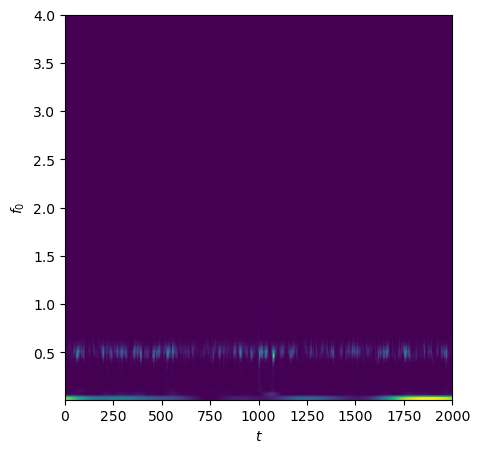

In [39]:
from astroML_fourier import wavelet_PSD

f0 = np.linspace(0.01, 4, 100)
wPSD = wavelet_PSD(t, x, f0, Q=2)#修改y为周期轴

fig = plt.figure(figsize=(5, 5))
ax = plt.subplot(111)
ax.imshow(wPSD, origin='lower', aspect='auto',extent=[t[0], t[-1], f0[0], f0[-1]])

ax.set_xlim(0,2000)
ax.set_ylim(0.01,4)

ax.set_xlabel('$t$')
ax.set_ylabel('$f_0$')